In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # 今回のキーパーソン（おぶじぇくと）
import seaborn as sns

%matplotlib inline

In [2]:
# こちらからデータをとってきた
# https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
df = pd.read_csv('../input/AirPassengers.csv')

In [3]:
df.shape

(144, 2)

In [4]:
df.head()

Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

In [5]:
df.tail()

Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

# とりあえずプロットしてみる

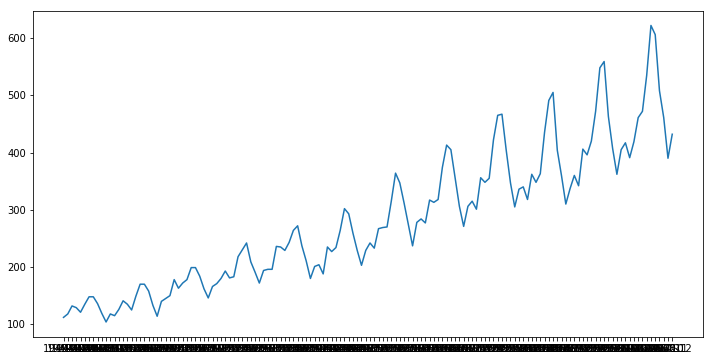

In [6]:
plt.figure(figsize=(12, 6)) # とりあえずいい感じのサイズ感にしてくれる
plt.plot(df.Month, df['#Passengers']); # とりあえずプロットできる

こういう時、データの型がtimeSeriesになってない可能性が高い

In [7]:
df.dtypes

Month          object
#Passengers     int64
dtype: object

ほらね

In [8]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

format指定すると動作がかるくなる  
指定しない場合、さらに下のオブジェクトを参照して日時の型が一致するまでformatを探索するので重たくなる場合がある。積極的にformat指定しよう。

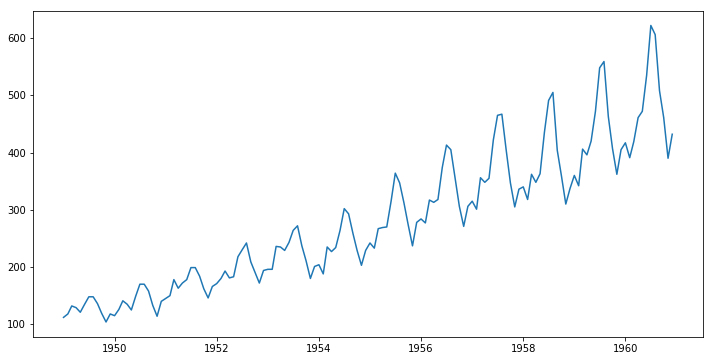

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers']);

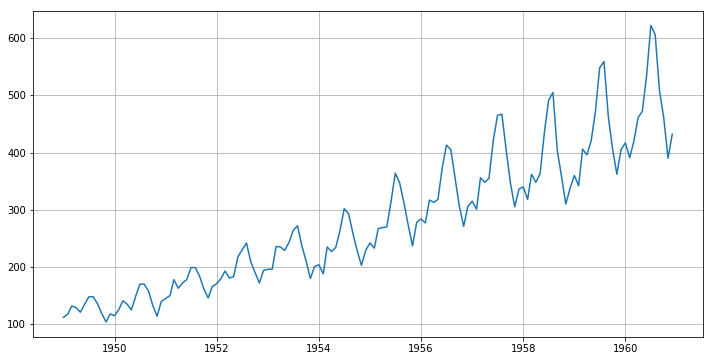

In [10]:
fig, ax = plt.subplots(figsize=(12, 6)) # 細かい設定のためにfig と ax を指定する

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True); # grid を True にする（そのまんま）

データの型を指定したことによりプロットの動作も軽くなる。

# ちっちゃい目盛りを与える

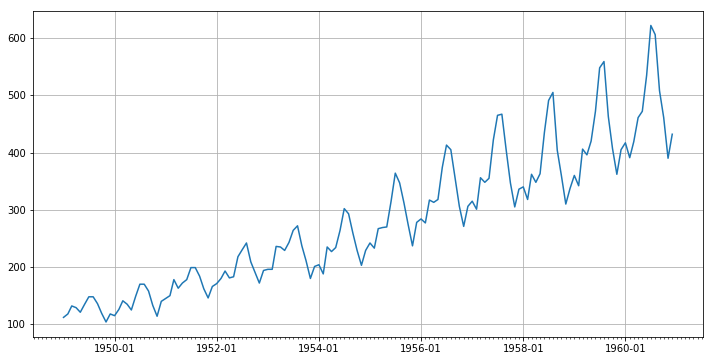

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator() # 月の設定
years = mdates.YearLocator() # 年の設定
tickFmt = mdates.DateFormatter('%Y-%m') # 軸ラベルに与える表示フォーマットの指定

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True)
ax.xaxis.set_major_formatter(tickFmt) # おっきい目盛りの指定（そもそもが年単位になっていた）
ax.xaxis.set_minor_locator(months) # ちっちゃい目盛りの指定

# ちっちゃい目盛りをへらしてラベルをつける

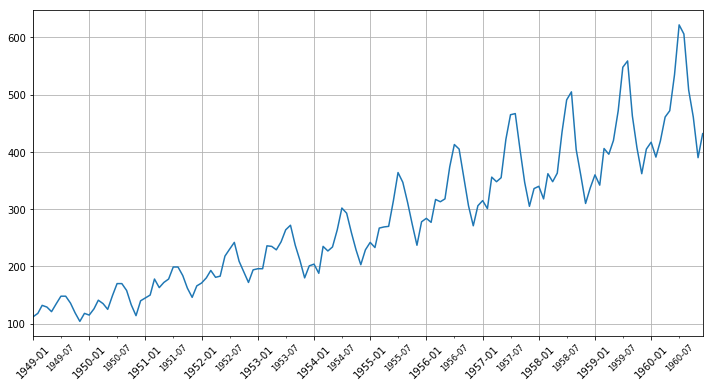

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator(bymonth=7) # bymonth指定で毎年何月の目盛りをふるか指定できる
years = mdates.YearLocator()
tickFmt = mdates.DateFormatter('%Y-%m')

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True)
ax.xaxis.set_major_formatter(tickFmt)
ax.xaxis.set_minor_formatter(tickFmt) # ちっちゃいめもりにもラベルかいてね！
ax.xaxis.set_major_locator(years) # なくても良い（統一感なくて気持ち悪かったので書いた）
ax.xaxis.set_minor_locator(months)
ax.tick_params(axis='x', which='minor', rotation=45, labelsize='small') # ちっちゃいめもりのラベル設定
plt.xlim(df['Month'].min(), df['Month'].max()) # ついでに枠いっぱいいっぱい書くようにした
plt.xticks(rotation=45); # これ書かないとおっきい目盛りは回転しくれない

# ちっちゃい目盛りにグリッド線を与える

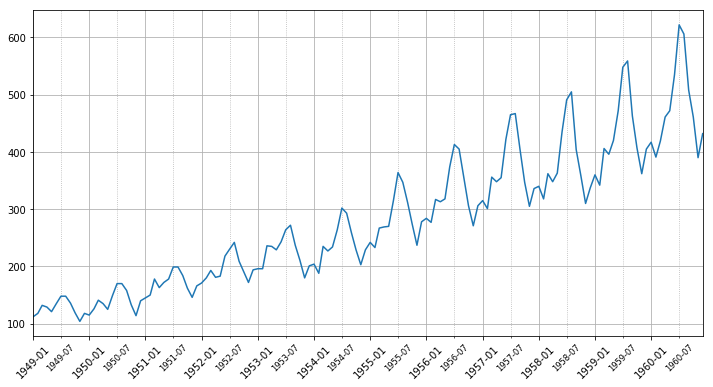

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator(bymonth=7)
years = mdates.YearLocator()
tickFmt = mdates.DateFormatter('%Y-%m')

plt.plot(df['Month'], df['#Passengers'])

ax.grid(which='major') # ここをいじってあげる
ax.grid(which='minor', linestyle=':') # ちっちゃい軸に対するグリッドの設定
ax.xaxis.set_major_formatter(tickFmt)
ax.xaxis.set_minor_formatter(tickFmt)
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
ax.tick_params(axis='x', which='minor', rotation=45, labelsize='small')
plt.xlim(df['Month'].min(), df['Month'].max())
plt.xticks(rotation=45);

# ちっちゃい目盛りを四半期ごとに与える

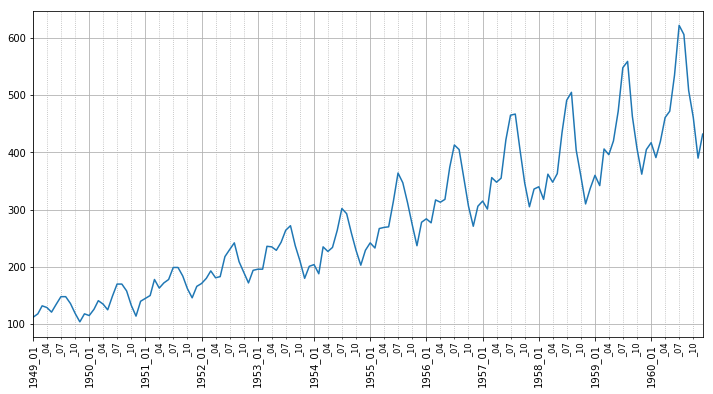

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

months = mdates.MonthLocator(bymonth=np.array([4, 7, 10])) # bymonthはnp.array指定するのがミソ
years = mdates.YearLocator()
majorFmt = mdates.DateFormatter('%Y_%m') # おっきい軸用フォーマット
minorFmt = mdates.DateFormatter('_%m')  # ちっちゃい軸用フォーマット

plt.plot(df['Month'], df['#Passengers'])

ax.grid(True)
ax.grid(which='minor', linestyle=':')
ax.xaxis.set_major_formatter(majorFmt) # majorFmtを適用
ax.xaxis.set_minor_formatter(minorFmt) # minorFmtを適用
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_locator(years)
ax.tick_params(axis='x', which='minor', rotation=90, labelsize='small') # 90度にしないとごちゃる
plt.xlim(df['Month'].min(), df['Month'].max())
plt.xticks(rotation=90); # 上に同じく